## Snakemake for Converting GMET Forcing to Snakemake ##

Using [snakemake](https://snakemake.readthedocs.io/en/stable/) to wrap a meteorological data processing workflow

### Main snakemake file - gmet_to_summa

The Snakemake file below can be used to run the entire data processing workflow.
The Snakemake file is first written, then run from the command line.





#### Write the snakemake code below to file

Note that this is python code, which some additional syntax for snakemake.

In [16]:
%%writefile ../gmet_to_summa.smk
''' 
gmet to summa snakemake master snakemake file

This snakemake file runs all the steps required to convert GMET forcings to SUMMA forcings.

Original process code: Andy Wood
Adapted to Snakemake: Dave Casson

'''
from pathlib import Path
from scripts import gmet_to_summa_utils as utils

# Resolve paths from the configuration file
config = utils.resolve_paths(config, log_config = True)

# Read in all local snakemake files and rules
include: './rules/gmet_file_prep.smk'
include: './rules/remap_gmet_to_shp.smk'
include: './rules/metsim_file_prep.smk'
include: './rules/run_metsim.smk'
include: './rules/metsim_to_summa.smk'

# Read all forcing files and create a list based on the output directory (i.e. ens/filename.nc)
_, file_path_list = utils.build_ensemble_list(config['gmet_forcing_dir'])

# Run the snakemake file, so that that it produces a summa input file for each of the gmet forcing files
rule gmet_to_summa:
    input:
        expand(Path(config['summa_forcing_dir'],'{forcing_file}.nc'), forcing_file = file_path_list)
        

Overwriting ../gmet_to_summa.smk


### Perform a Dry Run, and unlock the working directory

In [10]:
## Perform a dry run to check the workflow is configured correctly.
! snakemake --unlock -s ../gmet_to_summa.smk --configfile ../config/gmet_to_summa_test_case_config.yaml
! snakemake -s ../gmet_to_summa.smk --configfile ../config/gmet_to_summa_test_case_config.yaml --dry-run

Unlocking working directory.
Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).


## Run the complete gmet to summa snakemake workflow

In [11]:
! snakemake -s ../gmet_to_summa.smk -c 8 --configfile ../config/gmet_to_summa_test_case_config.yaml  --quiet

Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).
Complete log: .snakemake/log/2023-08-22T091018.766563.snakemake.log


### Visualize the workflow rules

Note that the graphviz must be installed

Building DAG of jobs...


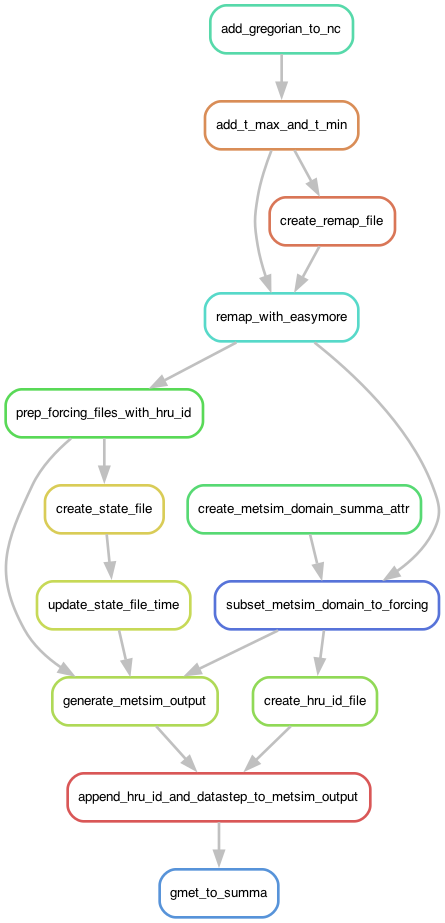

In [14]:
from IPython import display
# Buold build the rule graph
! snakemake -s ../gmet_to_summa.smk --configfile ../config/gmet_to_summa_test_case_config.yaml --rulegraph | dot -Tpng > ../reports/gmet_to_summa_rule.png
# Python command to visualise the built image in our notebook
display.Image('../reports/gmet_to_summa_rule.png')



### Visualize the workflow files

Note that the graphviz must be installed

Building DAG of jobs...


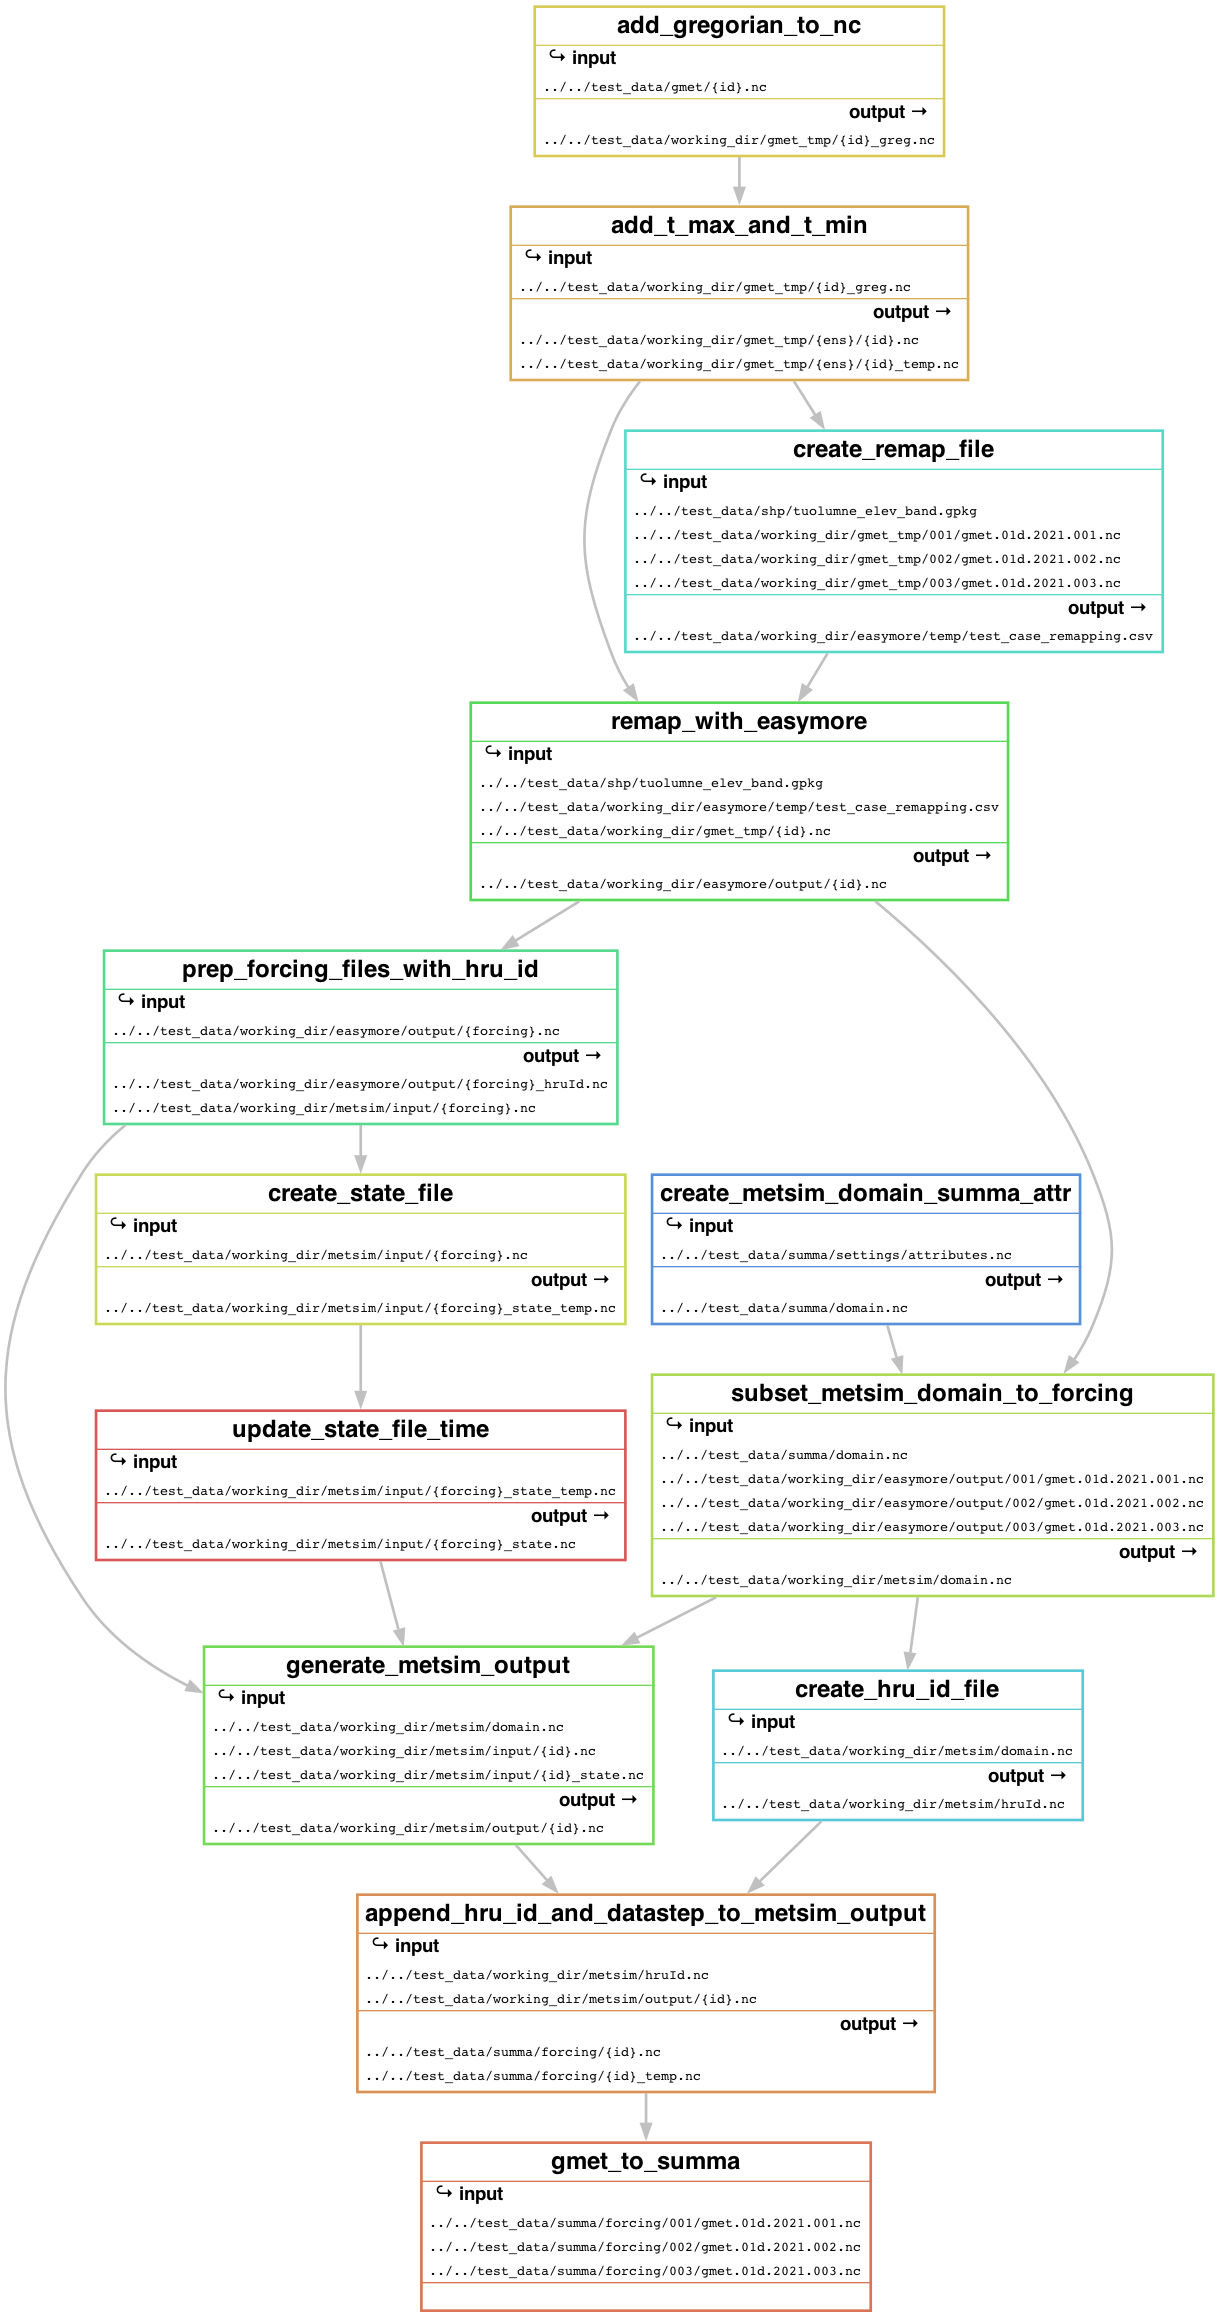

In [15]:
# Build the file graph
! snakemake -s ../gmet_to_summa.smk --configfile ../config/gmet_to_summa_test_case_config.yaml --filegraph | dot -Tpng > ../reports/gmet_to_summa_file.png
display.Image('../reports/gmet_to_summa_file.png')